In [105]:
!jupyter nbconvert --to pdf Final_Project_MA336_2211376.ipynb


[NbConvertApp] Converting notebook Final_Project_MA336_2211376.ipynb to pdf
[NbConvertApp] Support files will be in Final_Project_MA336_2211376_files/
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Making directory ./Final_Project_MA336_2211376_files
[NbConvertApp] Writing 79367 byte

# Introduction

The project are containing a datasets from Kaggle which can be seen using this link:

https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download

The project are aimed to predict the death event that are occur when the patient are coming to the hospital. The output that expected are which the patient will be died or not based on previous data. The project will consist two models from ensemble learning which are 


*   **Random Forest**
*   **XGBoost**

The report itself will contain several section such as


1.   Introduction
2.   Methods
3.   Result
4.   Conclusion







# Methods

There are two methods that will be used on this report the first is random forest and the second one is XGBoost, which two of them are the methods from ensamble learning 

## Random Forest 

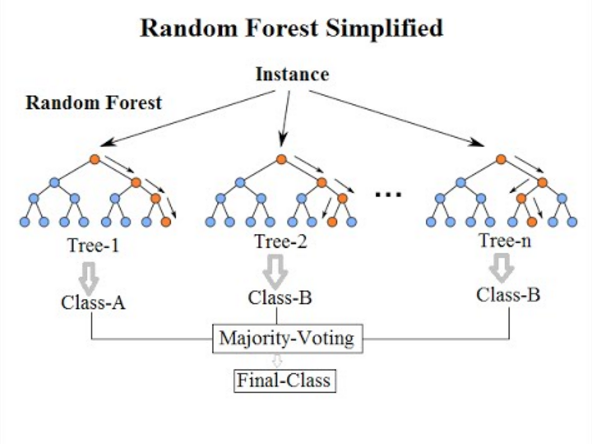

In [62]:
from IPython.display import Image
Image('Random_forest_diagram_complete.png')


The random forest are the development of desicion tree, where the random forest will combine several desicion tree that are merge with one tree. In this project we will be used random forest for classifier, wich in the dataset we would like to predict weather the data is 1 or 0 or the patient will be died or not.

## XGBoost

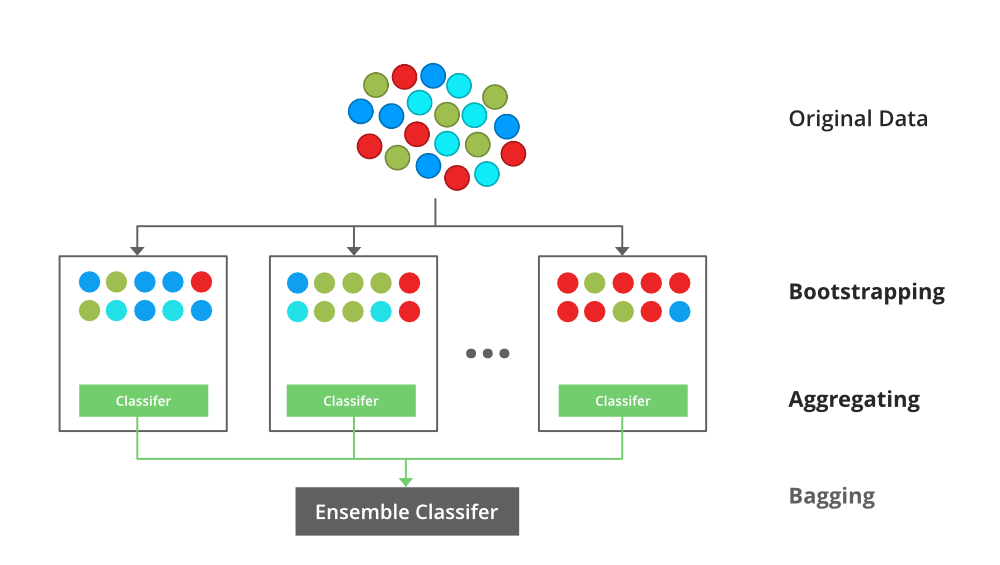

In [63]:
Image('Xgboosting.png')

The Xgboosting classifier is one of the methods that used for classify the output based on previous data. Tree boosting itself is also widely used for machine learning methods, especially for classification problem, which one of the best model that can be used to predict classification problems.

# Result

The result will be consist of several section such as



1.   Libraries Import
2.   Data Loading
3.   Data Exploration
4.   Data Cleansing & Preprocessing
5.   Model Building
6.   Model Training
7.   Model Evaluation 
8.   Model Interference
9.   Conclusion

## Importing Libraries

First, we need to importing several libraries to our jupyter collab which contain several libraries, that can be done using

In [64]:
import pandas as pd #for data manipulation
import numpy as np #for mathematical purposes
import matplotlib.pyplot as plt #for data visualization
import plotly as plot #for plotting
import seaborn as sns #for making heatmap plotting
from sklearn import preprocessing #to preprocessing the data
from collections import Counter #to counting the data
from sklearn.model_selection import train_test_split # to perform testing split
from sklearn.metrics import roc_auc_score #to perform model evaluation
from sklearn.model_selection import learning_curve #to perform model evaluation
from sklearn.metrics import roc_curve #to perform model evaluation
from sklearn.model_selection import cross_val_score #to perform model evaluation
from sklearn.preprocessing import MinMaxScaler #to do scaling with the data
from sklearn.ensemble import RandomForestClassifier # to importing the model
from xgboost import XGBClassifier #importing model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #model evaluation
from imblearn.over_sampling import SMOTE #for performing rebalancing data

## Data Loading

First we need to load the data and performing data knowledge and get a brief knowledge about the data

In [65]:
#using pandas to load data
init_data = pd.read_csv(r'/content/drive/MyDrive/S2 Arya/Matkul/Artificial Intelligence & its application/Final Project/Data.csv')
init_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


From here we can get an brief understanding that the data are containing of 299 rows and also contain 13 columns

## Data Exploration

### Brief Understanding About the data

In this phase we want to look the statistical descriptive from the data which can be done by this code

In [66]:
init_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


From the statistical descriptive of the data we can see that there are several outliers can be detected, but overall we can make sure using several methods after this. After that, there are other statistical information we want to know is the null value, we would like to know is there any null value on the data

In [67]:
init_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


From there we can see that, there are no null value on the data

## Exploratory data analysis

In [68]:
init_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


First we can do exploratory data analysis, first we would like to see the distribution of the age

Text(66.91728227424748, 44.415, 'Mean: 60.83')

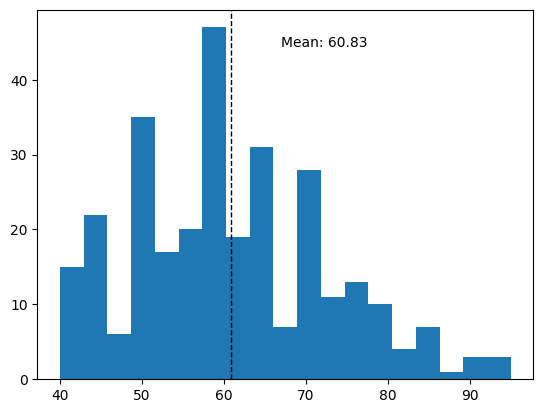

In [69]:
plt.hist(init_data['age'],bins=19)
plt.axvline(init_data['age'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(init_data['age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(init_data['age'].mean()))

We can see from the data, the data seems to be right skewed/not properly distributed, this can be strengthen using statistical analysis where mean != mode != median

we can also lookout for all the histogram plot using this code

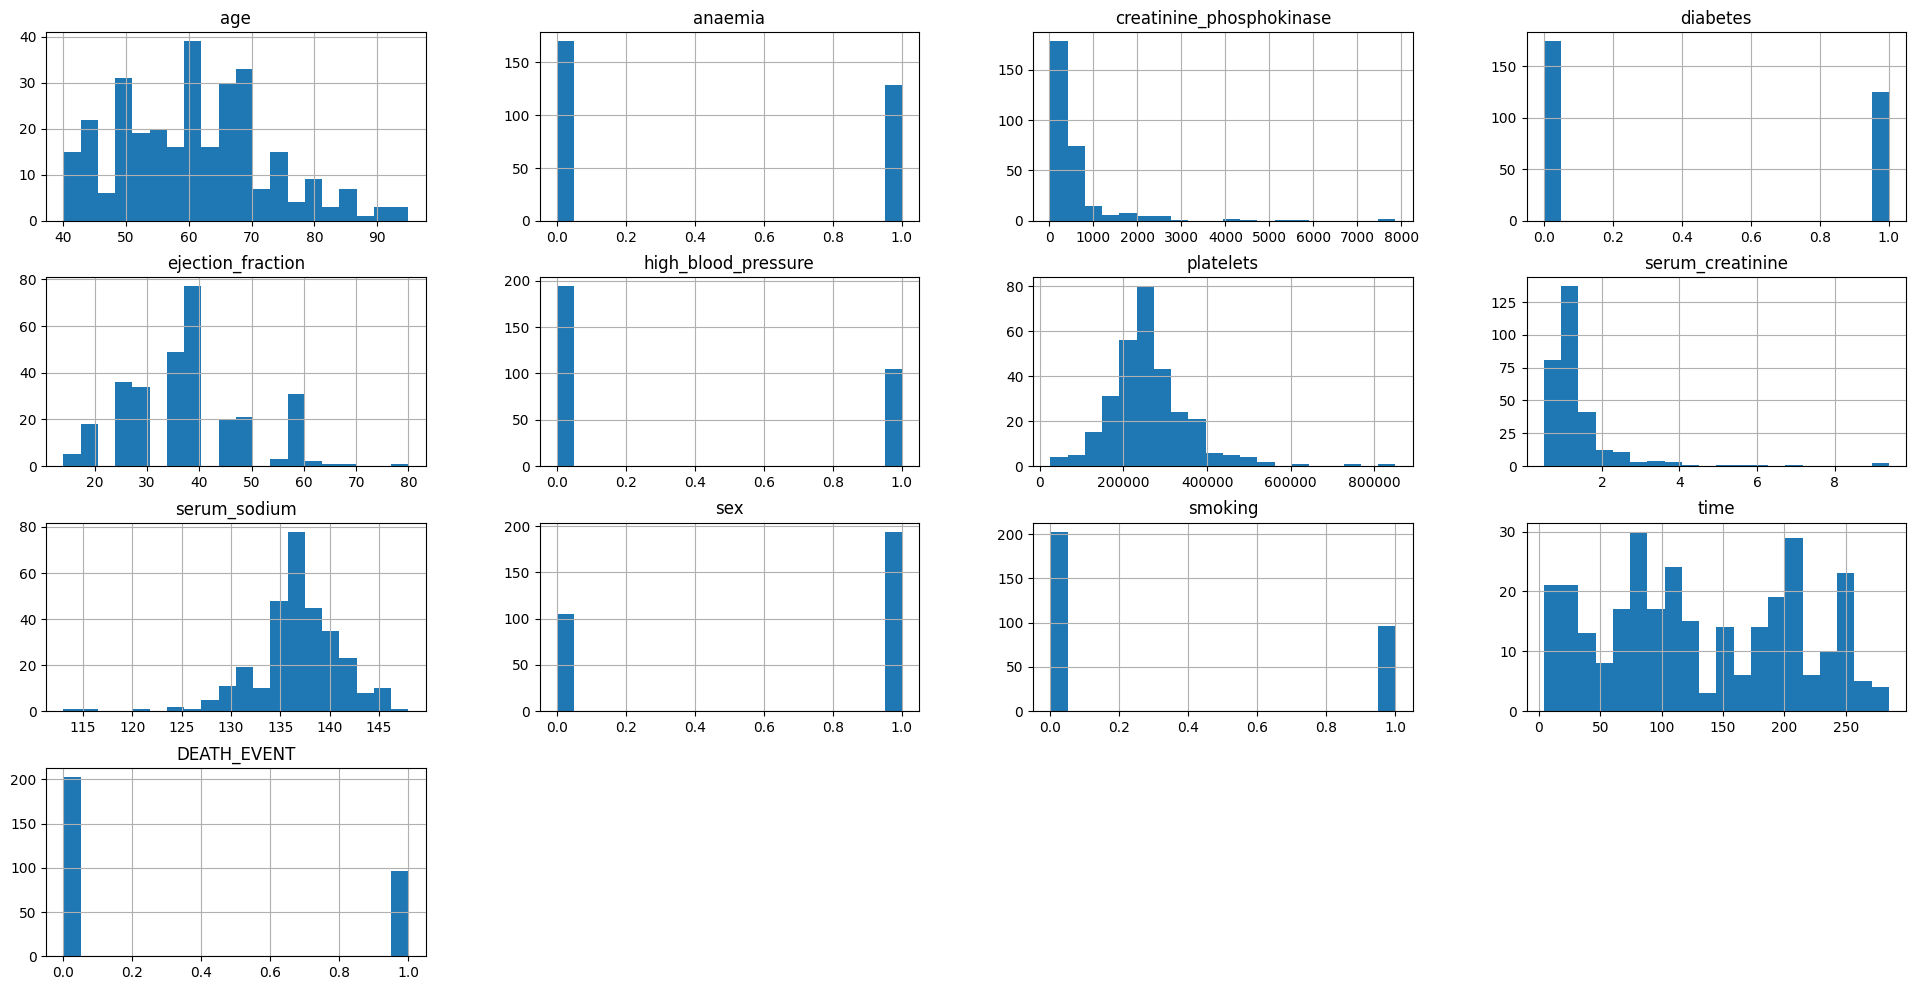

In [70]:
init_data.hist(figsize=(24,12),bins=20)
plt.show()

Next we want to see the distribution using the boxplot, we can done using this code

<Axes: >

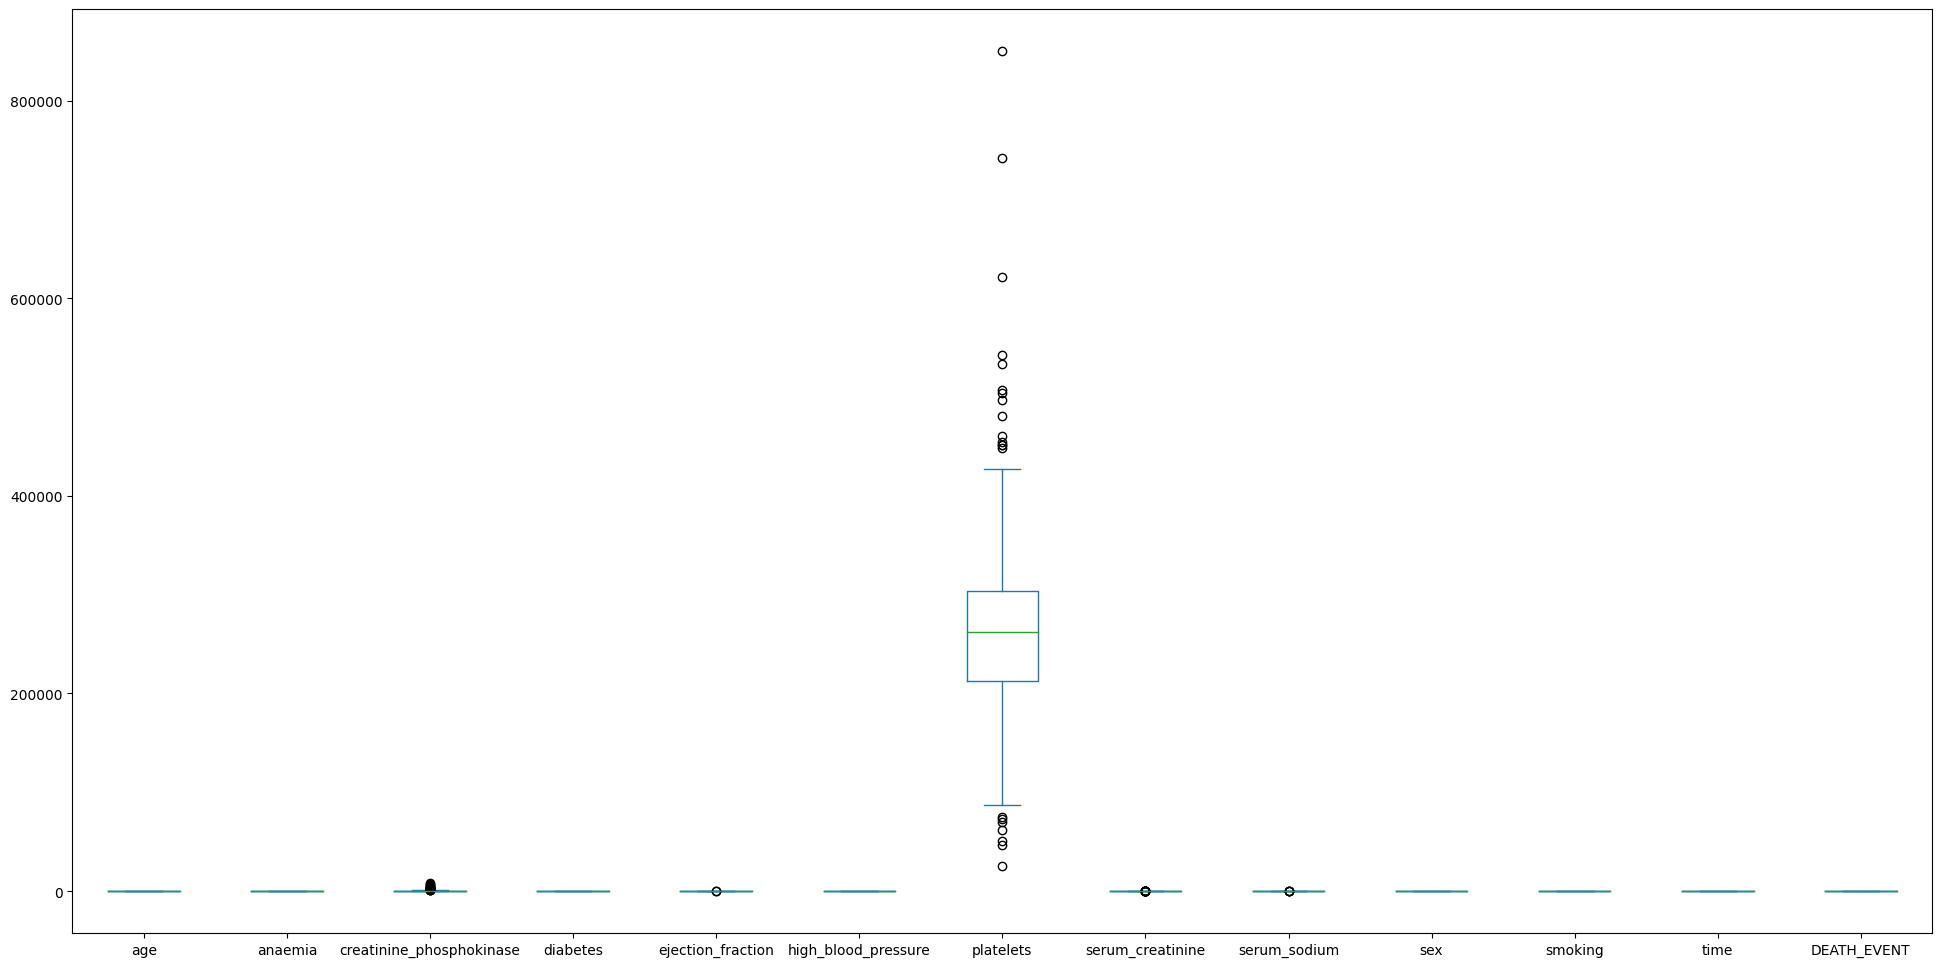

In [71]:
init_data.plot.box(figsize=(24,12))


We can see there are several outliers on platelets, we will make sure if it's important to our model after we done some correlation analysis, using this code

In [72]:
plt.figure(figsize=(10,10))
korelasi = init_data.corr()
korelasi

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Data Correlation')

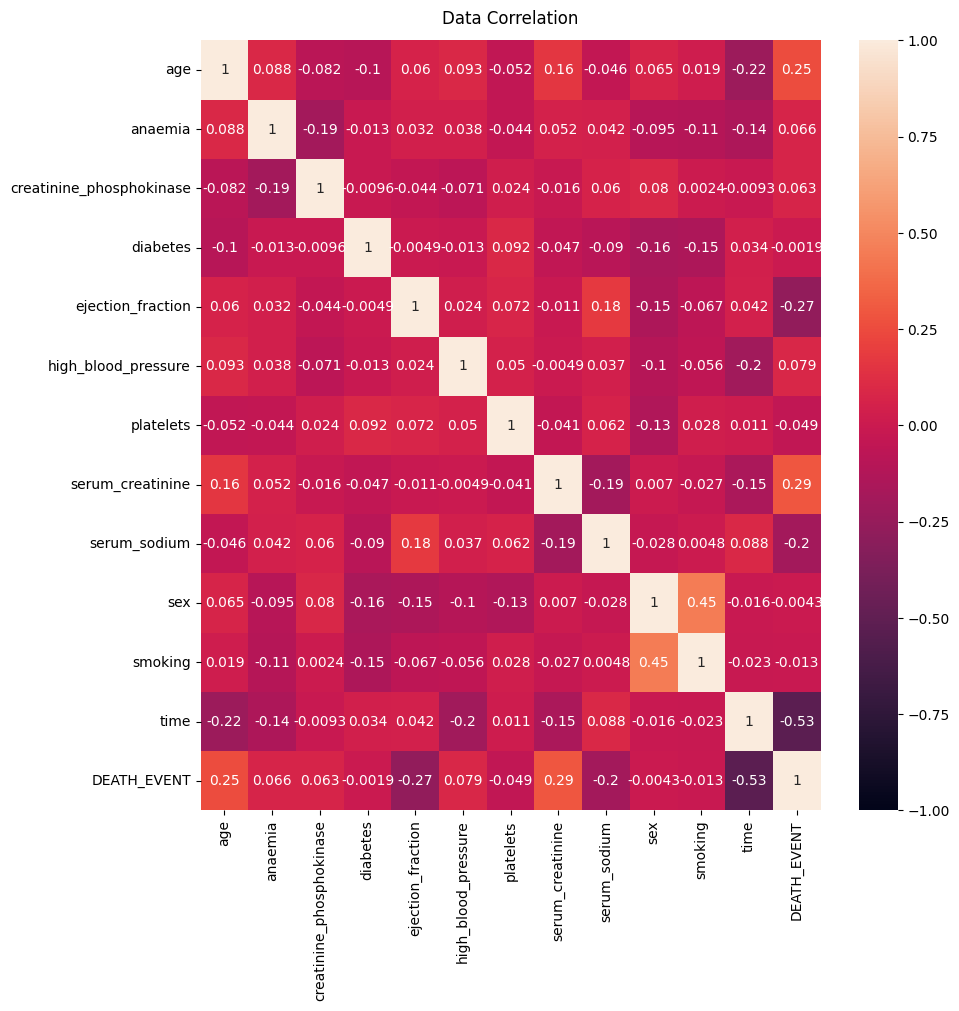

In [73]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(init_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Data Correlation', fontdict={'fontsize':12}, pad=12)

Or we can also do sorting like this

In [74]:
sorted_mat = abs(korelasi['DEATH_EVENT']).sort_values(ascending=False)
print(sorted_mat)

DEATH_EVENT                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
Name: DEATH_EVENT, dtype: float64


From here we can see that we will get 5 top features are most correlated to our target variables (Death Event), the 5 features are:



1.   time
2.   serum_creatinine
3.   ejection_fraction
4.   age
5.   serum_sodium

## Data Cleaning & Preprocessing

We can select the 5 most feature using this code

In [75]:
data_fix = init_data[['time','serum_creatinine','ejection_fraction','age','serum_sodium','DEATH_EVENT']]
data_fix

,time,serum_creatinine,ejection_fraction,age,serum_sodium,DEATH_EVENT
0,4,1.9,20,75.0,130,1
1,6,1.1,38,55.0,136,1
2,7,1.3,20,65.0,129,1
3,7,1.9,20,50.0,137,1
4,8,2.7,20,65.0,116,1
...,...,...,...,...,...,...
294,270,1.1,38,62.0,143,0
295,271,1.2,38,55.0,139,0
296,278,0.8,60,45.0,138,0
297,280,1.4,38,45.0,140,0


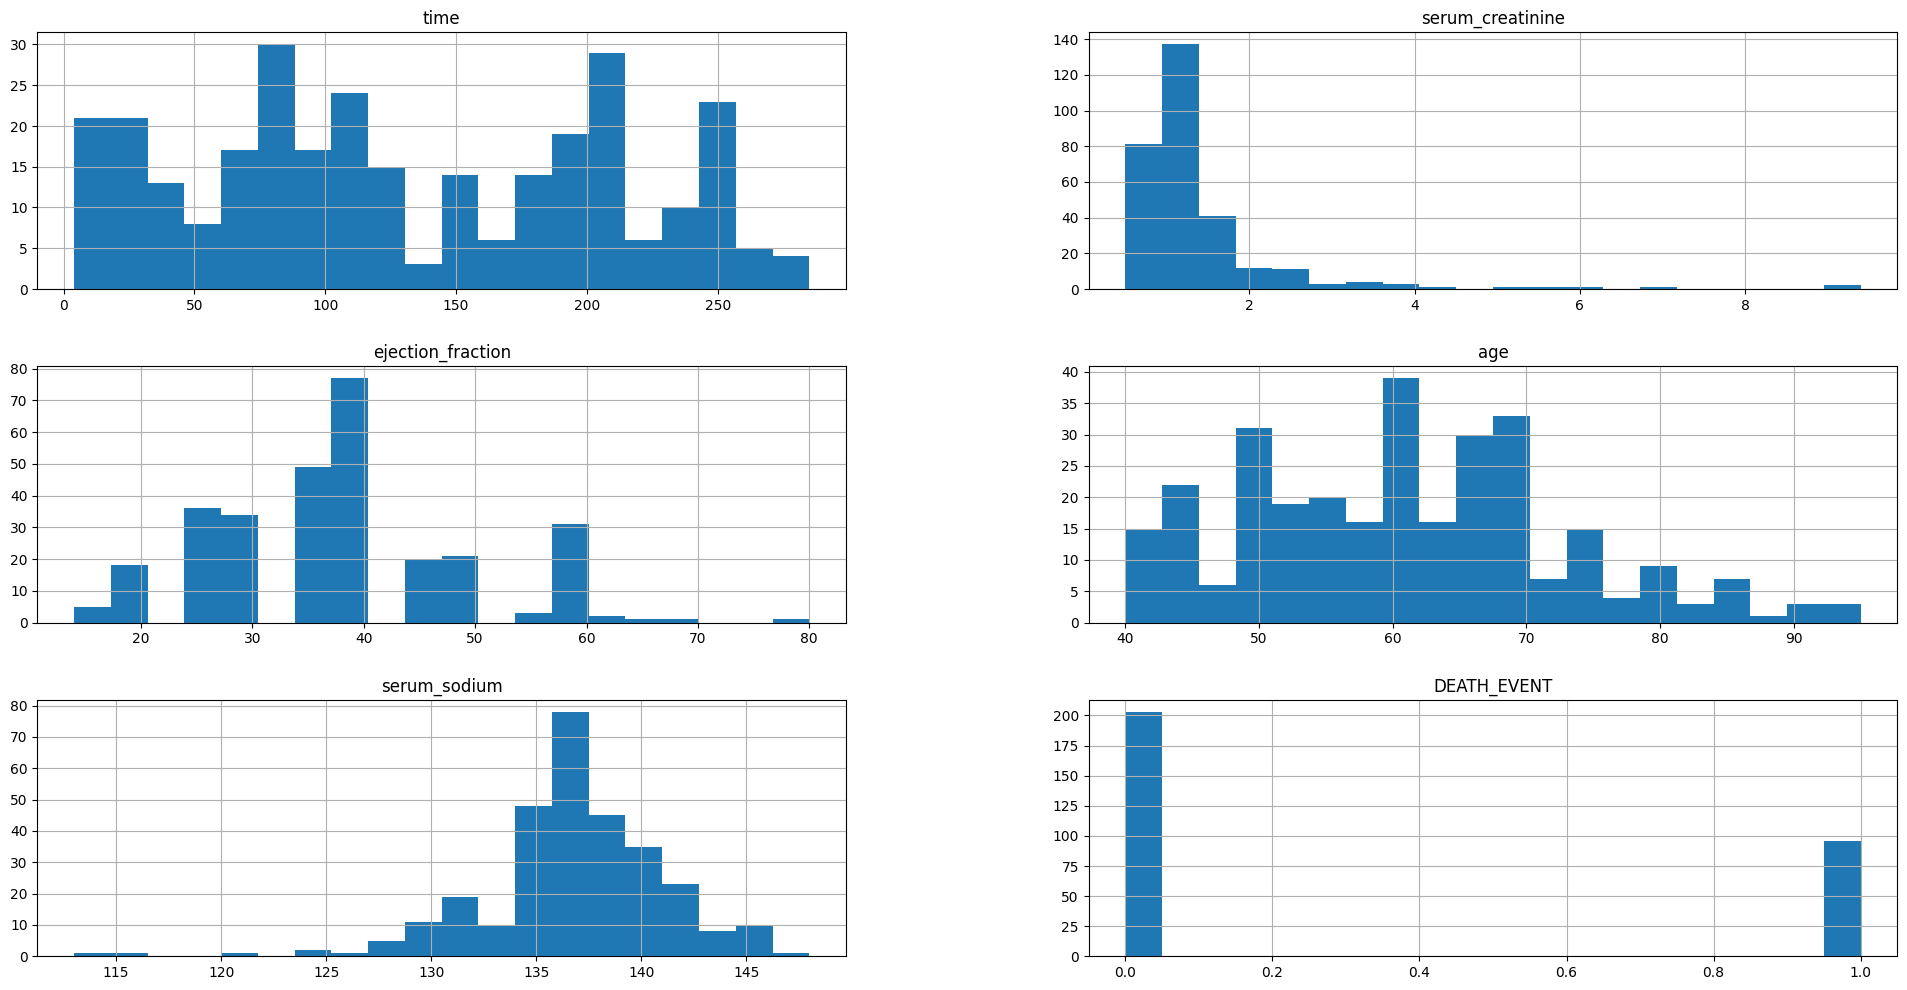

In [76]:
data_fix.hist(figsize=(24,12),bins=20)
plt.show()

After we do some feature selection, we can do some splitting to feature and target variables using this code

In [77]:
X = data_fix.drop('DEATH_EVENT',axis=1).copy()
y = data_fix['DEATH_EVENT'].copy()

From the histogram plot, we can see that there are some imbalanced data to our target variable (Death Event), we will perform some cleansing of the data using rebalancing data

In [78]:
counter=Counter(y)
counter

Counter({1: 96, 0: 203})

We can see that 1 or there are dead event are 96 and also 0 is 203, this means the data is imbalanced, we can do several techniques to solved the problems, we will try to used oversampling method, because instead of using undersampling method, it will reduced our data

In [79]:
try_oversample = SMOTE()

cek = SMOTE(sampling_strategy='minority')
X_rebalance, y_rebalance = cek.fit_resample(X,y)
Counter(y_rebalance)

Counter({1: 203, 0: 203})

(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 203.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

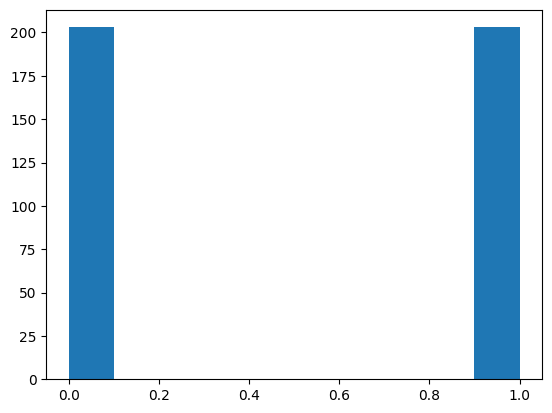

In [80]:
plt.hist(y_rebalance)

After the data are balanced, because all of them have a different scale, we need to scaling the data

In [81]:
array_rebalance = np.array(X_rebalance)

In [82]:
scaler = MinMaxScaler()
arr_scale = np.array([scaler])

In [83]:
scaler.fit(array_rebalance)
X_scaled = scaler.transform(array_rebalance)

In [84]:
X_scaled

array([[0.        , 0.15730337, 0.09090909, 0.63636364, 0.48571429],
       [0.00711744, 0.06741573, 0.36363636, 0.27272727, 0.65714286],
       [0.01067616, 0.08988764, 0.09090909, 0.45454545, 0.45714286],
       ...,
       [0.43772242, 0.05839446, 0.27272727, 0.12740421, 0.77142857],
       [0.46975089, 0.20381298, 0.09090909, 0.35327859, 0.6       ],
       [0.12455516, 0.01197882, 0.36363636, 0.36363636, 0.71428571]])

After we perform the scaling techniques, we can split the data by the train and split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_rebalance, test_size=0.2, random_state=0)

In [86]:
X_train.shape

(324, 5)

In [87]:
X_test.shape

(82, 5)

In [88]:
y_train.shape

(324,)

In [89]:
y_test.shape

(82,)

Now we have:



1.   324 feature train data
2.   82 feature test data
3.   324 target variable train data
4.   82 target variable test data

After that we can try to fitted our model into the data



## Model Building

First we can call the random forest classifier model using this code

In [90]:
random_forest = RandomForestClassifier()

And the other one, we can also call the model 

In [91]:
xgboost = XGBClassifier()

## Model Training

We can training the model, to fitting them into our dataset

### Random Forest

In [92]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

### XgBoost

In [93]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Model Evaluation

After that we can evaluate the model and improve the model

### Random Forest

First We can see the confussion matrix, we can use this code

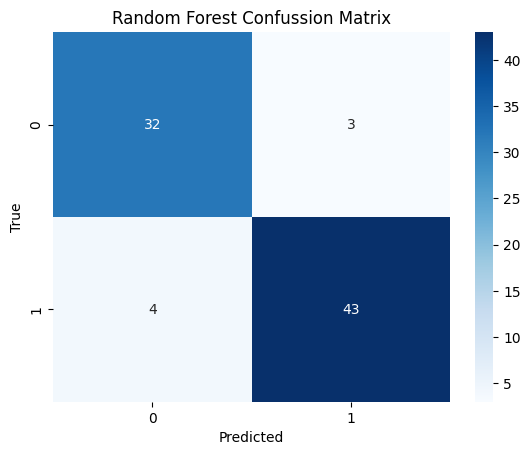

In [94]:
y_pred = random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.title('Random Forest Confussion Matrix')
plt.ylabel('True')
plt.show()

We can see from here that only 2 false negative and 4 positive from our prediction, overall it's a good model.

Next we want to perform AOC Evaluation to evaluate our random forest model

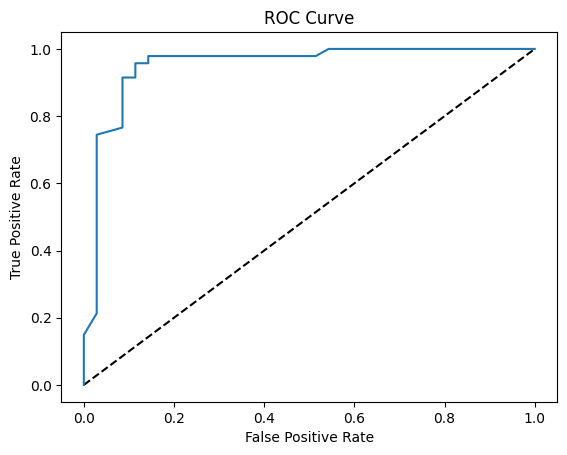

AUC Score: 0.9507598784194529


In [95]:
y_pred_proba = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


print('AUC Score:', roc_auc_score(y_test, y_pred_proba))

From here we can see the auc score is very good, our model can differentiate the positive and also the negative classes from our data

Next evaluation, is classification report

In [96]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.93      0.91      0.92        47

    accuracy                           0.91        82
   macro avg       0.91      0.91      0.91        82
weighted avg       0.92      0.91      0.91        82



From here we can see that our precision is quite high, about 94%, this means that our model can predict the data accurate, for the recall our model also have around 92%, this means that our model can detect positive (1) cases precisisely, for the accuracy, we also get around 93%, which means this model is accurate.

Next we want to evaluate to avoid overfitting in our model, we can use cross validation method to evaluate, using this code

In [97]:
scores_random = cross_val_score(random_forest, X, y, cv=5)
print('Cross-validation scores:', scores_random)
print('Average score:', np.mean(scores_random))

Cross-validation scores: [0.4        0.78333333 0.8        0.68333333 0.6779661 ]
Average score: 0.6689265536723165


Our model have average score of 0.67, its quite good, to show our model is not overfitting, overall the model is good for prediction.

### XGBoost

Next we would like to evaluate our xgboost model, first same as above we want to evaluate using confussion matrix

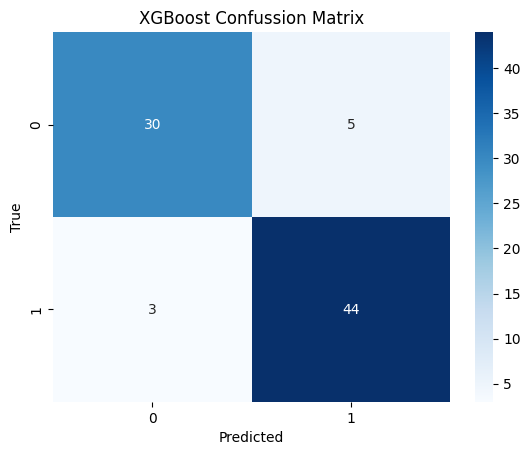

In [98]:
y_pred_1 = xgboost.predict(X_test)
cm_1 = confusion_matrix(y_test, y_pred_1)

sns.heatmap(cm_1, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.title('XGBoost Confussion Matrix')
plt.ylabel('True')
plt.show()

From here we can get there are 5 false positive and there is 1 false negative, next we will move into the AOC Score

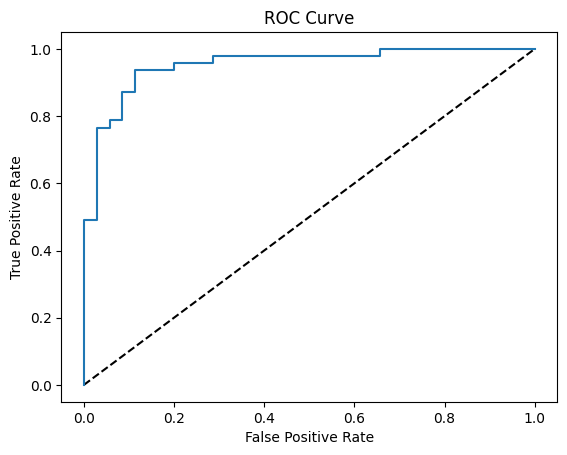

AUC Score: 0.9507598784194529


In [99]:
y_pred_proba_1 = xgboost.predict_proba(X_test)[:,1]
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_proba_1)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC score
print('AUC Score:', roc_auc_score(y_test, y_pred_proba))

Here we can get the AUC score of 95% its means that its score are little higher than our random forest model, next one we will evaluate using classification report

In [100]:
y_pred_1 = xgboost.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.90      0.94      0.92        47

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



From here we can see that average precision is 93%, recall 92%, and accuracy of 93%, overall it's a good model for prediction into our dataset, next we will move into cross validation score

In [101]:
scores_xgboost = cross_val_score(xgboost, X, y, cv=5)
print('Cross-validation scores:', scores_xgboost)
print('Average score:', np.mean(scores_xgboost))

Cross-validation scores: [0.38333333 0.65       0.46666667 0.56666667 0.6779661 ]
Average score: 0.5489265536723164


From here we can get the average score of 0.54, and overall the random forest is better instead of our xgboost model

## Model Interference

We can try our model interference, first we can create a dummy input

In [102]:
masukan = X.sample()
masukan

,time,serum_creatinine,ejection_fraction,age,serum_sodium
25,23,1.9,38,80.0,144


After that we can try prediction using random forest

In [103]:
cek_random =random_forest.predict(masukan.values)
cek_random

array([0])

Our random forest predict the patient will be not die, next we can try using xgboost

In [104]:
cek_xg =xgboost.predict(masukan.values)
cek_xg

array([0])

# Conclusion

From here we can see that based on the evaluation of the model, both our model are good for predict dataset, but instead of xgboost, random forest have a better performance in cross validation score, for this modelling, we are more preferred to use random forest instead of xgboost models.